### Linear Experiments

Here are linear experiments when the diversity condition holds.

Each experiment is performed by using MLP and Linear Encoder

In [26]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from spaces import NSphereSpace

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

from experiment_utils.linear import perform_linear_experiment, linear_unrotation
import torch.nn as nn
from pathlib import Path

from visualization_utils.scoring import plot_scores
from visualization_utils.spheres import scatter3d_sphere
from encoders import SphericalEncoder, LinearEncoder

latent_dim = 3

tau = 0.3
kappa = 1 / tau

iterations_default = 20000
batch_default = 6144

# torch.manual_seed(789)

sphere = NSphereSpace(latent_dim)

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create figures directory
figures_dir = Path('figures')
figures_dir.mkdir(exist_ok=True)


def get_spherical_encoder(input_dim, output_dim):
    return SphericalEncoder(input_dim, [128, 256, 256, 256, 128], output_dim)


def get_linear_encoder(input_dim, output_dim):
    return LinearEncoder(input_dim, output_dim)


def perform_experiment(dimension, encoder_type, its):
    input_dim = dimension
    output_dim = 3
    
    # Naming prefix for this experiment
    exp_name = f"dim{dimension}_{encoder_type}"

    f = get_linear_encoder(input_dim, output_dim) if encoder_type == 'linear' else get_spherical_encoder(input_dim, output_dim)
    h, scores = perform_linear_experiment(
        input_dim, 
        its, 
        batch_default, 
        latent_dim, 
        sample_pair_fixed, 
        sample_uniform_fixed, 
        tau, 
        device, 
        f=f
    )

    # Plot and save training scores
    fig_scores = plot_scores(plt, scores)
    fig_scores.savefig(figures_dir / f'{exp_name}_training_scores.png', dpi=150, bbox_inches='tight')
    plt.show()

    z = sphere.uniform(4000).to(device)
    z_enc = h(z)

    # Plot and save side-by-side comparison
    fig_sidebyside = visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())
    fig_sidebyside.savefig(figures_dir / f'{exp_name}_original_vs_encoded.png', dpi=150, bbox_inches='tight')
    plt.show()

    z = sphere.uniform(100000)
    z_enc = h(z.cuda()).cpu()
    
    # Plot and save encoded sphere
    fig_enc = scatter3d_sphere(plt, z.cpu(), z_enc, s=10, a=.8)
    fig_enc.savefig(figures_dir / f'{exp_name}_sphere_encoded.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Plot and save original sphere
    fig_orig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10, a=.8)
    fig_orig.savefig(figures_dir / f'{exp_name}_sphere_original.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Unrotation - plot and save
    z_unrotated = linear_unrotation(z, z_enc)
    fig_unrot = scatter3d_sphere(plt, z.cpu(), z_unrotated, s=10, a=.8)
    fig_unrot.savefig(figures_dir / f'{exp_name}_sphere_unrotated.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"Figures saved to {figures_dir}/ with prefix '{exp_name}_'")


print('Using device', device)

## Experiment: Linear map to 4 dimensions, MLP Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.700075149536133 Pos Loss: -1.5223897695541382 Neg Loss: 10.222464561462402 Samples processed: 1 linear disentanglement: 0.479101300239563 permutation disentanglement: 0.5082332363838337 angle_preservation_error: 0.2158098965883255
Loss: 7.864289283752441 Pos Loss: -2.300311326980591 Neg Loss: 10.164600372314453 Samples processed: 21 linear disentanglement: 0.9892869591712952 permutation disentanglement: 0.7705446889512765 angle_preservation_error: 0.035208508372306824
Loss: 7.8155131340026855 Pos Loss: -2.3439676761627197 Neg Loss: 10.159481048583984 Samples processed: 41 linear disentanglement: 0.9964165091514587 permutation disentanglement: 0.7750271122357358 angle_preservation_error: 0.01978234387934208
Loss: 7.815054893493652 Pos Loss: -2.343831777572632 Neg Loss: 10.158885955810547 Samples processed: 61 linear disentanglement: 0.9978379607200623 permutation disentanglement: 0.7715052674923341 angle_preservation_error

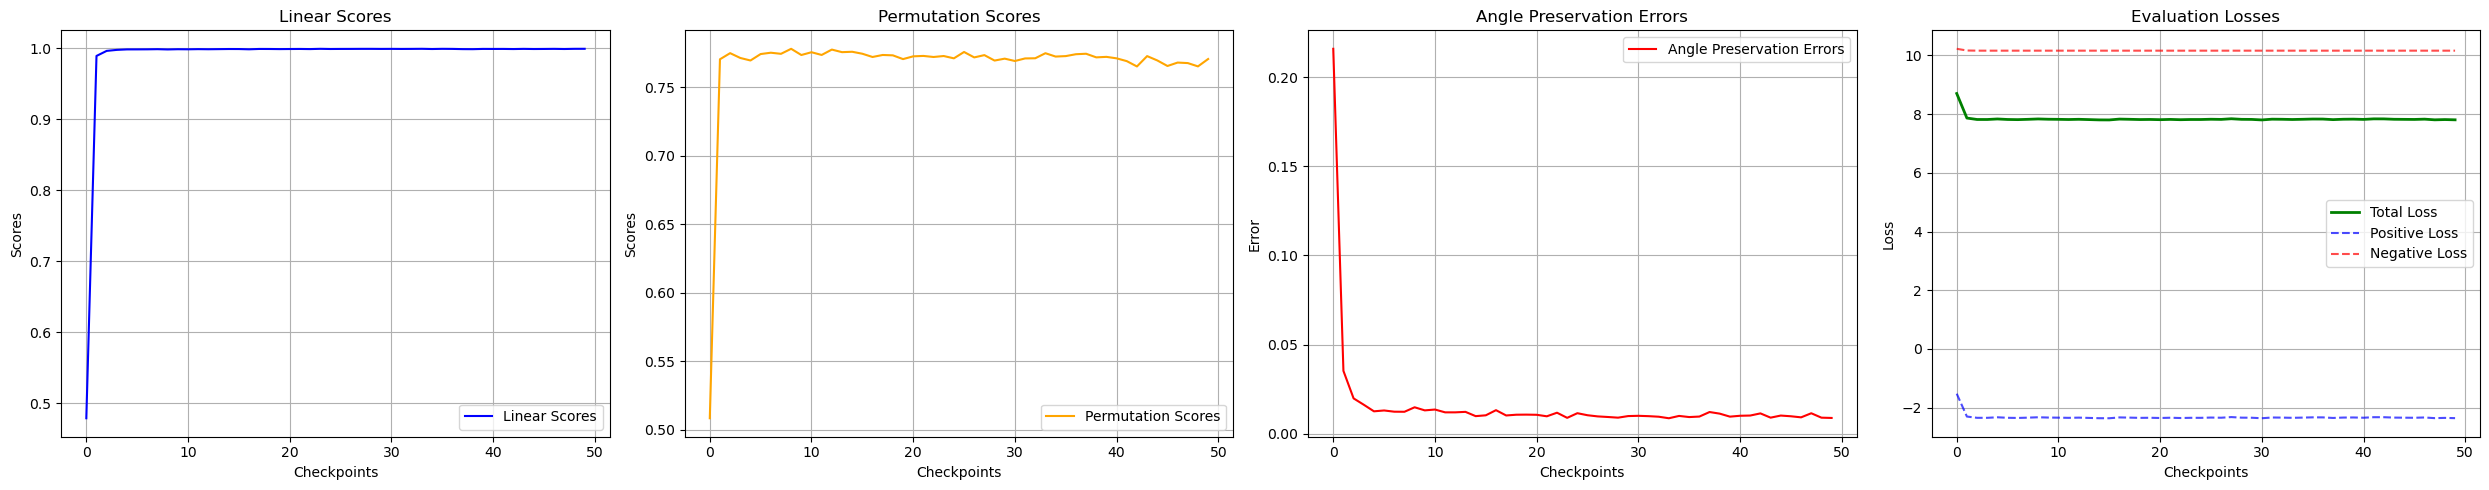

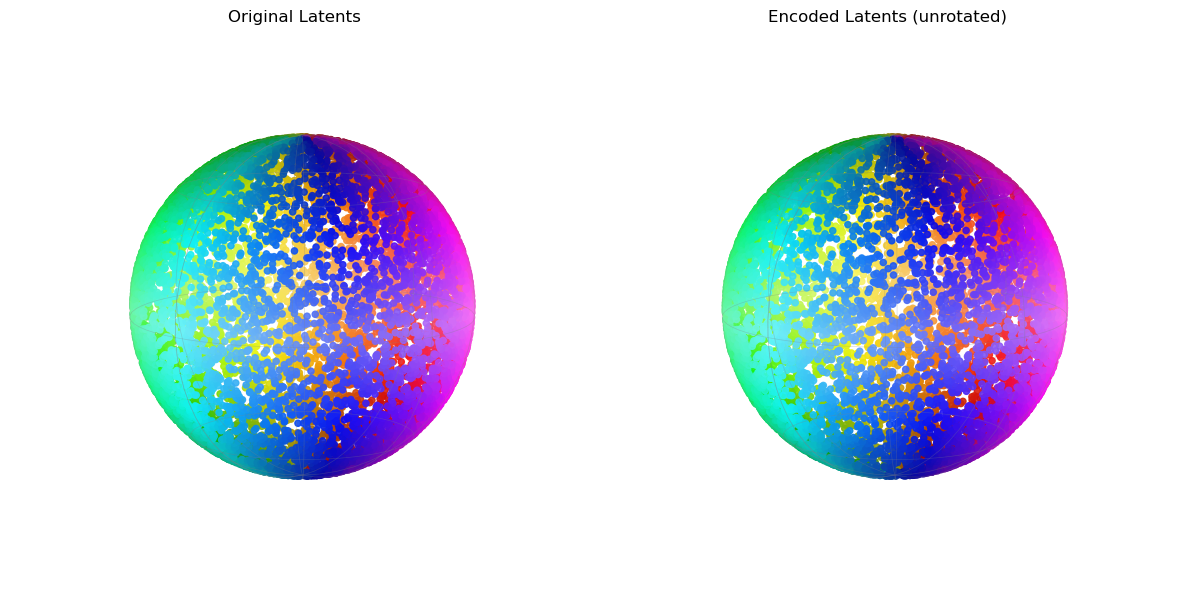

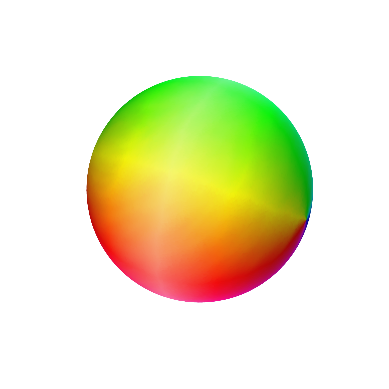

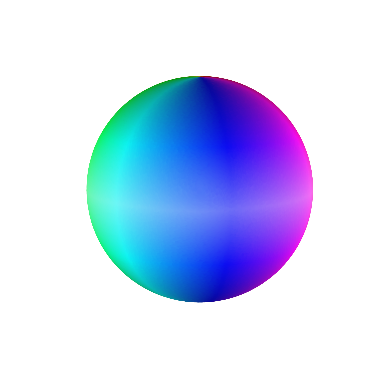

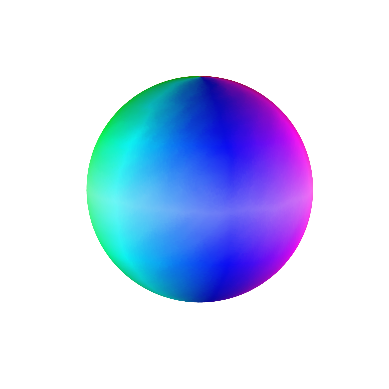

In [31]:
# 4 Dimensions
perform_experiment(4, 'mlp', 1000)

## Experiment: Linear map to 4 dimensions, Linear Encoder

In [29]:
perform_experiment(4, 'linear', 10000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.43112850189209 Pos Loss: -3.1275696754455566 Neg Loss: 11.558696746826172 Samples processed: 1 linear disentanglement: 0.7299839854240417 permutation disentanglement: 0.6975597942132358 angle_preservation_error: 0.409723162651062


Loss: 8.429219245910645 Pos Loss: -3.110445022583008 Neg Loss: 11.539665222167969 Samples processed: 21 linear disentanglement: 0.7390761375427246 permutation disentanglement: 0.6948225033576113 angle_preservation_error: 0.40376657247543335
Loss: 8.417997360229492 Pos Loss: -3.1038291454315186 Neg Loss: 11.521825790405273 Samples processed: 41 linear disentanglement: 0.7376543879508972 permutation disentanglement: 0.6886794542642792 angle_preservation_error: 0.40161076188087463
Loss: 8.405523300170898 Pos Loss: -3.0949063301086426 Neg Loss: 11.5004301071167 Samples processed: 61 linear disentanglement: 0.7468193173408508 permutation disentanglement: 0.6916584379859758 angle_preservation_error: 0.3954748809337616
Loss: 8.38394832611084 Pos Loss: -3.0982120037078857 Neg Loss: 11.482158660888672 Samples processed: 81 linear disentanglement: 0.7545180320739746 permutation disentanglement: 0.6893810110236935 angle_preservation_error: 0.39328187704086304
Loss: 8.383808135986328 Pos Loss: -3.

KeyboardInterrupt: 

## Experiment: Linear map to 5 dimensions, MLP Encoder

Linear control score: 1.0
Permutation control score: 0.9999999999999999
Loss: 9.067961692810059 Pos Loss: -1.1734429597854614 Neg Loss: 10.24140453338623 Samples processed: 1 linear disentanglement: 0.2956230342388153 permutation disentanglement: 0.41938017757129714 angle_preservation_error: 0.2675819396972656


Loss: 7.837729454040527 Pos Loss: -2.3257412910461426 Neg Loss: 10.163470268249512 Samples processed: 21 linear disentanglement: 0.9887848496437073 permutation disentanglement: 0.8149275701794688 angle_preservation_error: 0.03844380006194115
Loss: 7.8367133140563965 Pos Loss: -2.3230693340301514 Neg Loss: 10.159782409667969 Samples processed: 41 linear disentanglement: 0.9968752861022949 permutation disentanglement: 0.8222826580511781 angle_preservation_error: 0.018953002989292145
Loss: 7.80609130859375 Pos Loss: -2.353074073791504 Neg Loss: 10.159165382385254 Samples processed: 61 linear disentanglement: 0.998156726360321 permutation disentanglement: 0.8218982843235212 angle_preservation_error: 0.014189193956553936
Loss: 7.794731140136719 Pos Loss: -2.364063262939453 Neg Loss: 10.158794403076172 Samples processed: 81 linear disentanglement: 0.9984808564186096 permutation disentanglement: 0.8226392974003979 angle_preservation_error: 0.012610250152647495
Loss: 7.814948081970215 Pos Loss

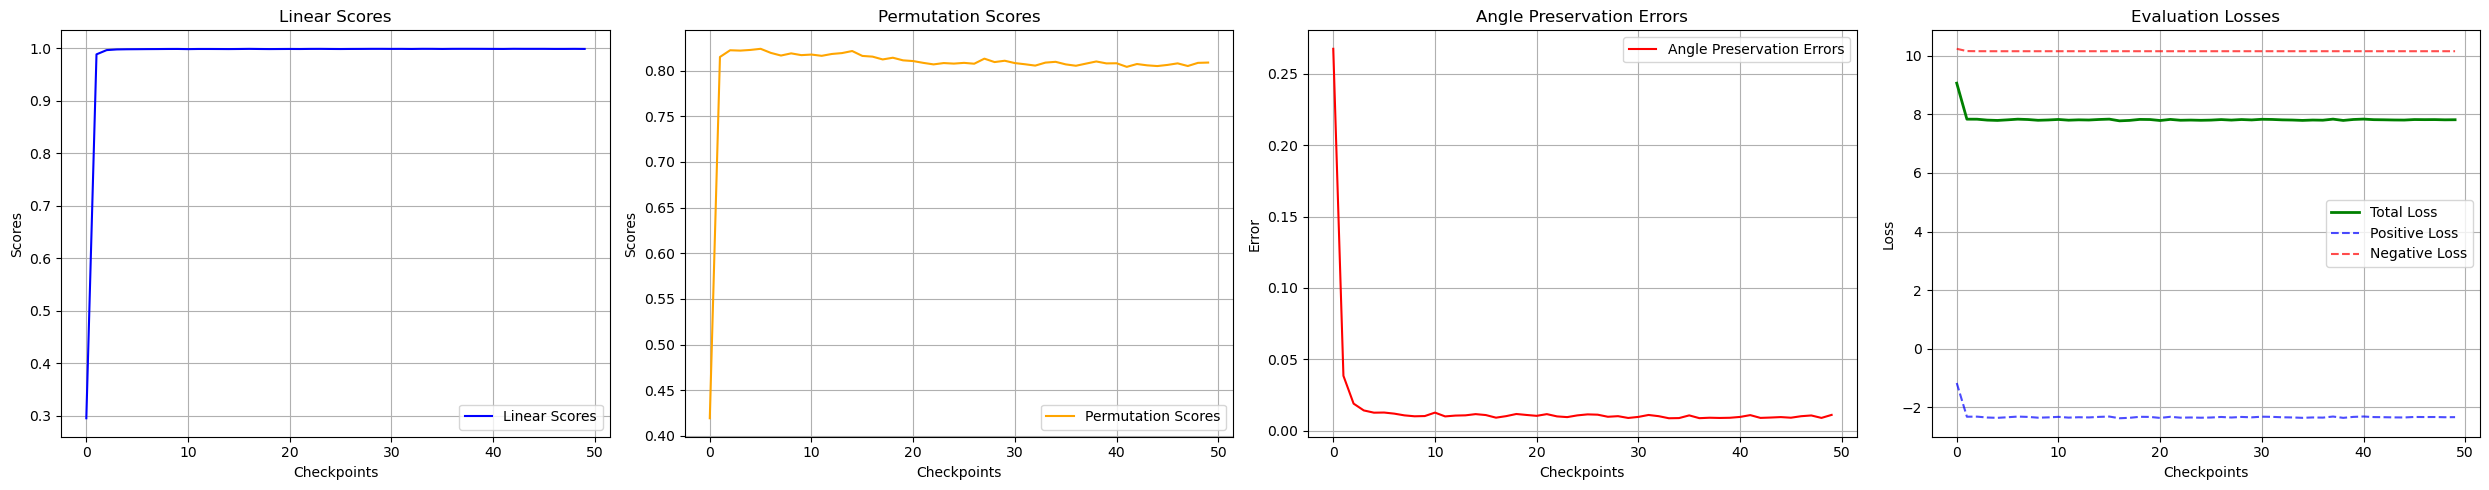

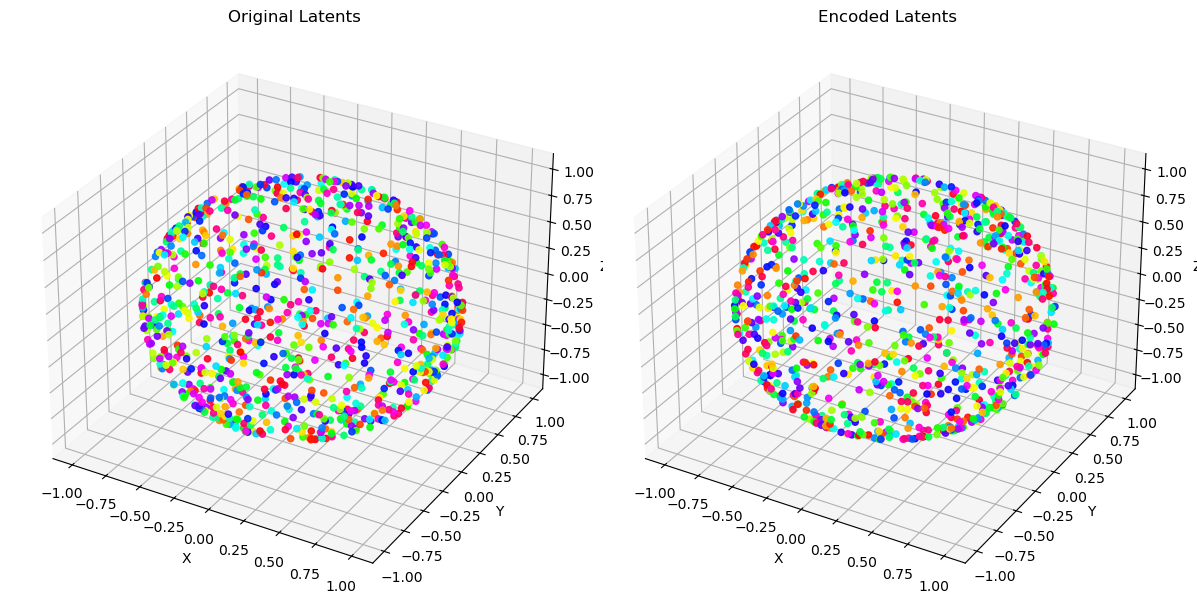

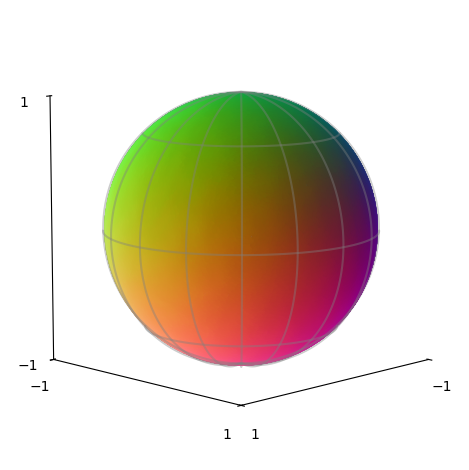

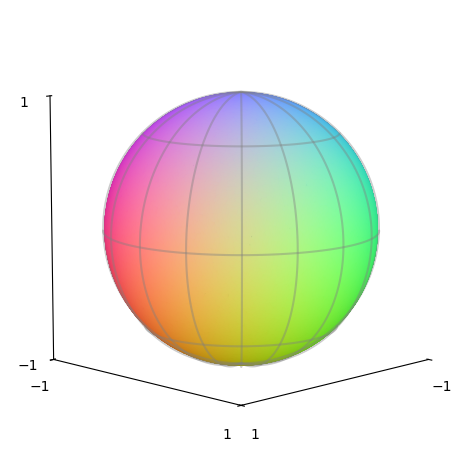

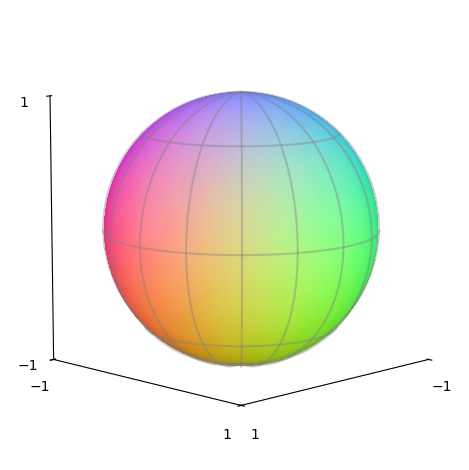

In [ ]:
perform_experiment(5, 'mlp', 1000)

# 5 dimensions, linear encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.473722457885742 Pos Loss: -2.2258005142211914 Neg Loss: 10.699522972106934 Samples processed: 1 linear disentanglement: 0.6081360578536987 permutation disentanglement: 0.6702223438704413 angle_preservation_error: 0.2071574479341507


Loss: 8.458641052246094 Pos Loss: -2.2459583282470703 Neg Loss: 10.70460033416748 Samples processed: 21 linear disentanglement: 0.6149389147758484 permutation disentanglement: 0.6839854623410545 angle_preservation_error: 0.2045261710882187
Loss: 8.463766098022461 Pos Loss: -2.2335290908813477 Neg Loss: 10.697294235229492 Samples processed: 41 linear disentanglement: 0.6155496835708618 permutation disentanglement: 0.6803984235712678 angle_preservation_error: 0.20201365649700165
Loss: 8.409005165100098 Pos Loss: -2.2926125526428223 Neg Loss: 10.701617240905762 Samples processed: 61 linear disentanglement: 0.6096967458724976 permutation disentanglement: 0.6701586820819124 angle_preservation_error: 0.20517097413539886
Loss: 8.447858810424805 Pos Loss: -2.256624698638916 Neg Loss: 10.704483032226562 Samples processed: 81 linear disentanglement: 0.6156708598136902 permutation disentanglement: 0.6851317595493734 angle_preservation_error: 0.2023954689502716
Loss: 8.435264587402344 Pos Loss: -2

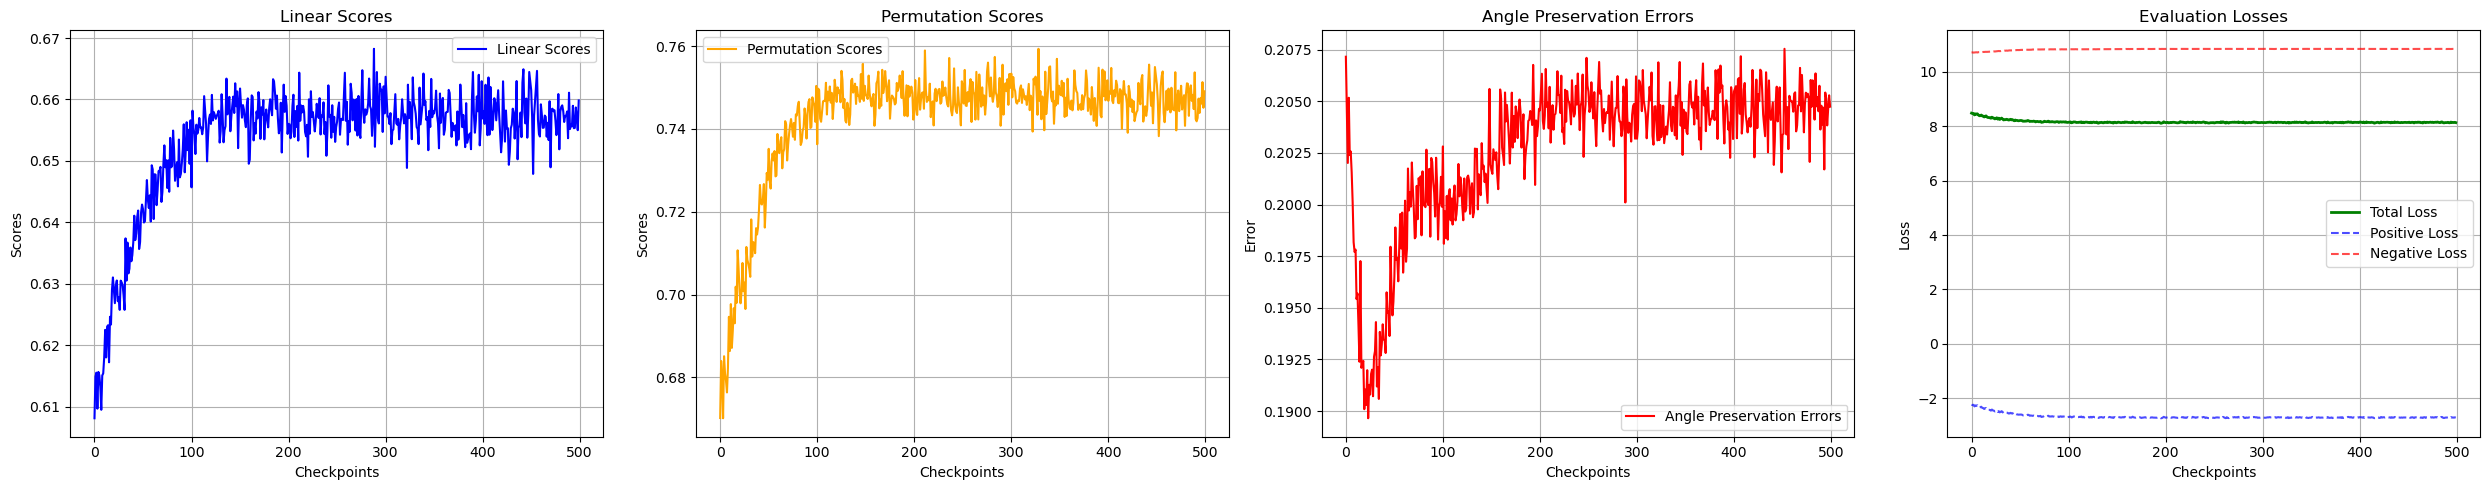

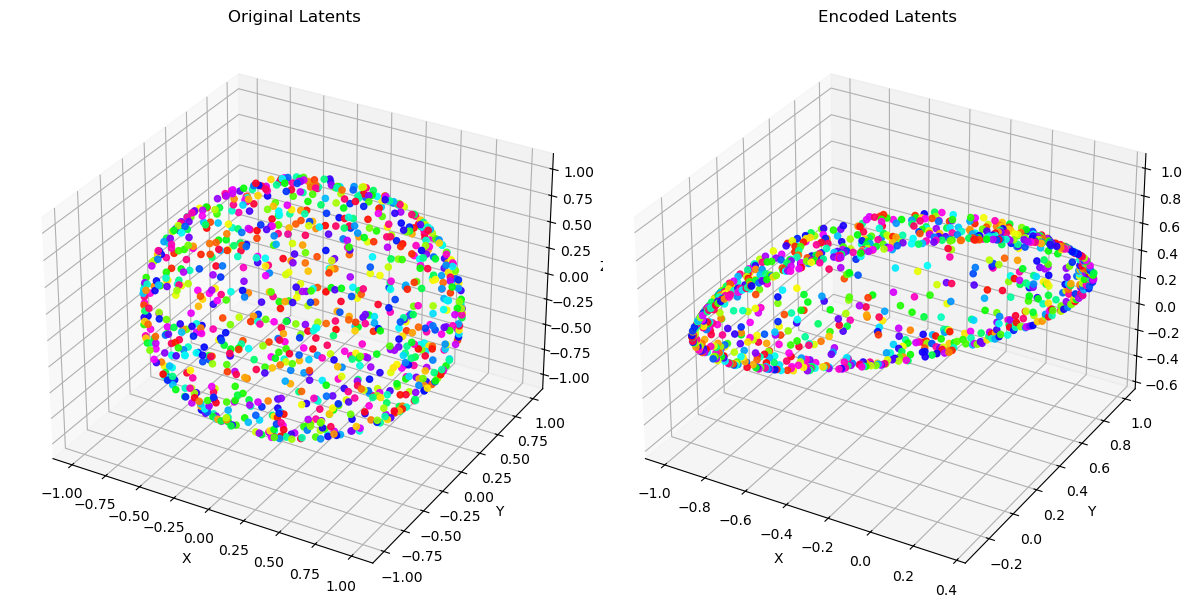

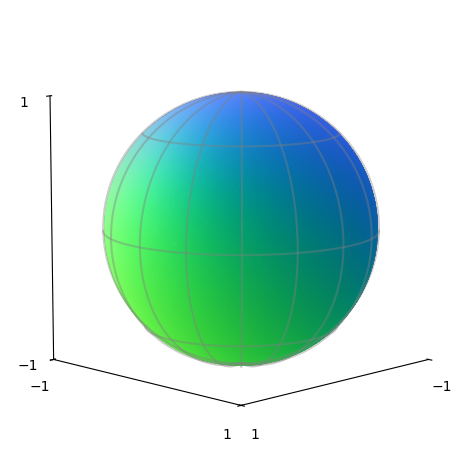

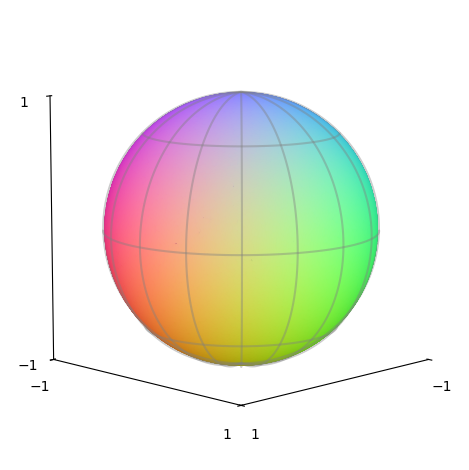

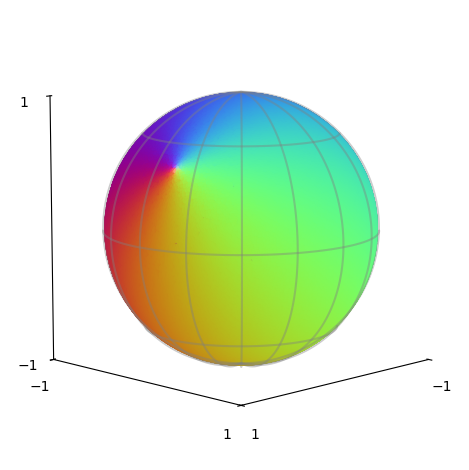

In [ ]:
perform_experiment(5, 'linear', 10000)

# 6 Dimensions MLP Encoder

Linear control score: 1.0
Permutation control score: 0.9999999999999999
Loss: 9.042471885681152 Pos Loss: -1.1627686023712158 Neg Loss: 10.205240249633789 Samples processed: 1 linear disentanglement: 0.3756118714809418 permutation disentanglement: 0.451073571600032 angle_preservation_error: 0.24836128950119019


Loss: 7.840853691101074 Pos Loss: -2.3217389583587646 Neg Loss: 10.162592887878418 Samples processed: 21 linear disentanglement: 0.9876737594604492 permutation disentanglement: 0.7335173151542188 angle_preservation_error: 0.03670163452625275
Loss: 7.833436012268066 Pos Loss: -2.325617551803589 Neg Loss: 10.159053802490234 Samples processed: 41 linear disentanglement: 0.996260941028595 permutation disentanglement: 0.7405769302841693 angle_preservation_error: 0.019790008664131165
Loss: 7.806777000427246 Pos Loss: -2.352346897125244 Neg Loss: 10.159124374389648 Samples processed: 61 linear disentanglement: 0.9976779818534851 permutation disentanglement: 0.7395479907215902 angle_preservation_error: 0.015543409623205662
Loss: 7.796058654785156 Pos Loss: -2.363135576248169 Neg Loss: 10.159194946289062 Samples processed: 81 linear disentanglement: 0.9981617331504822 permutation disentanglement: 0.7362148833928096 angle_preservation_error: 0.013697131536900997
Loss: 7.815779685974121 Pos Loss:

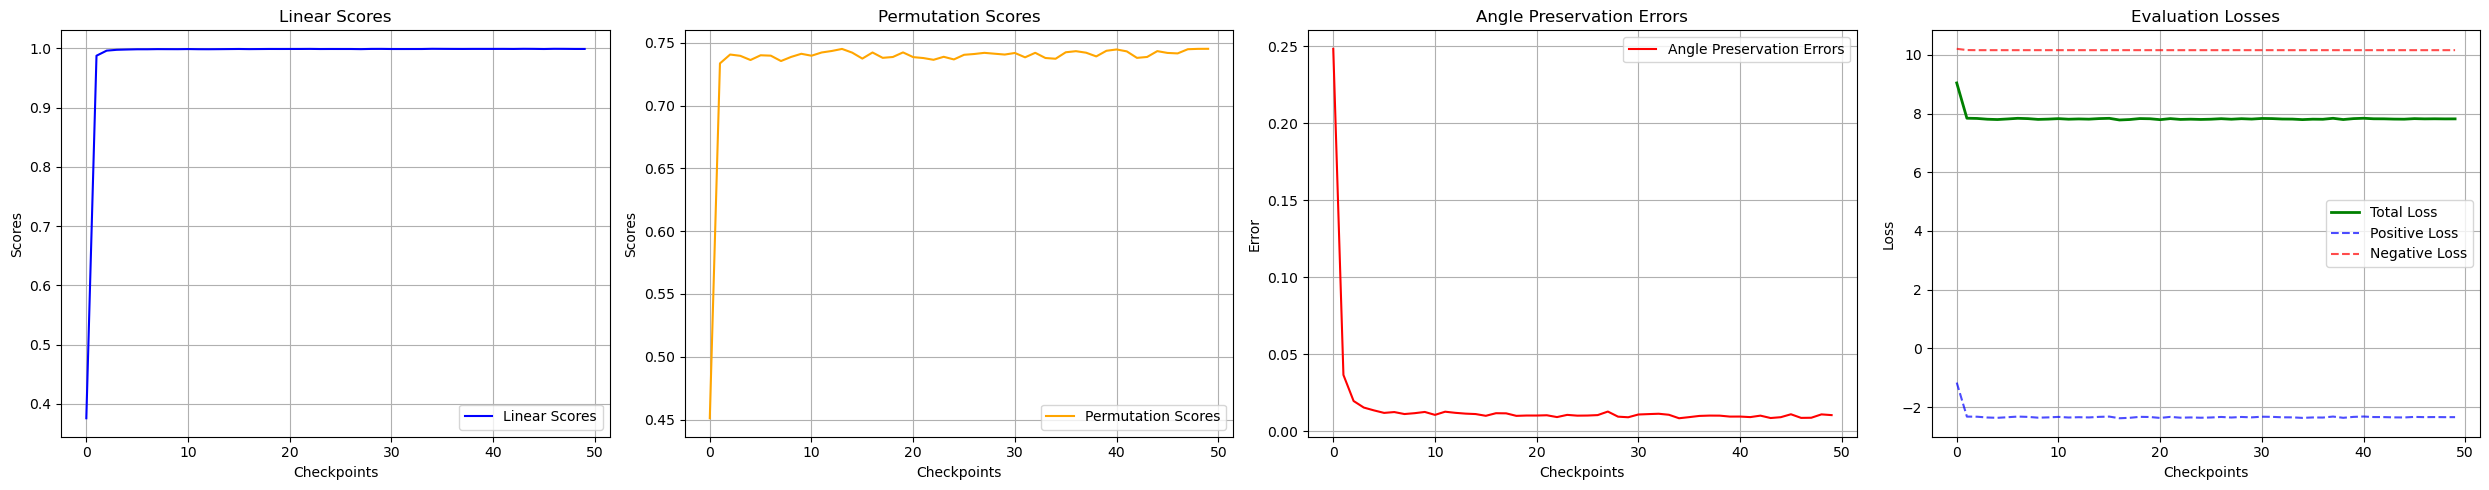

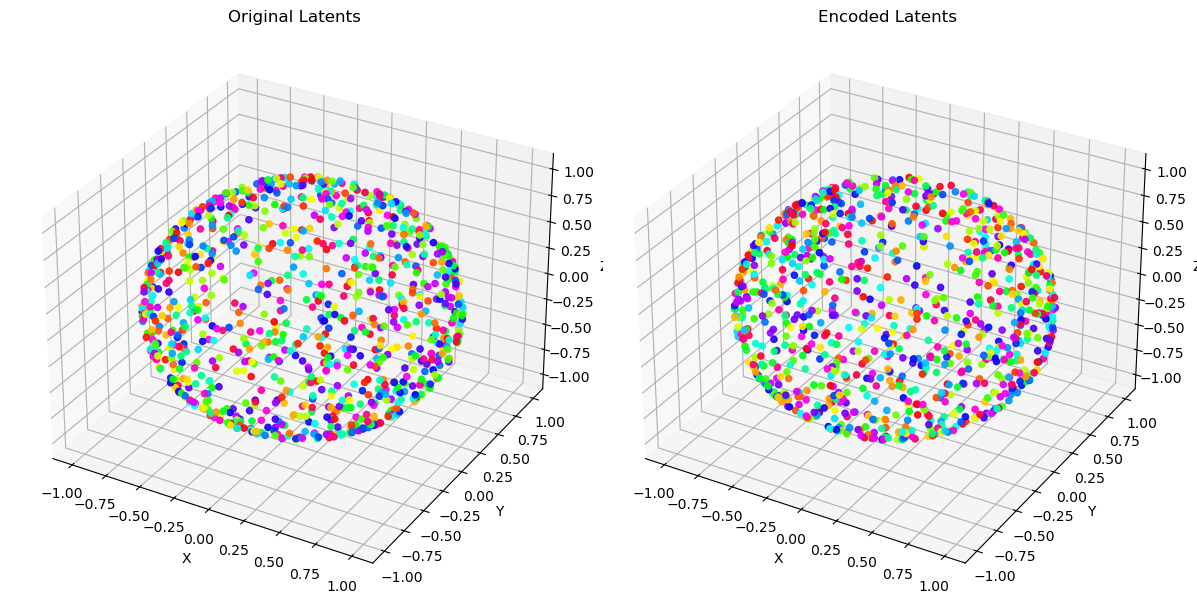

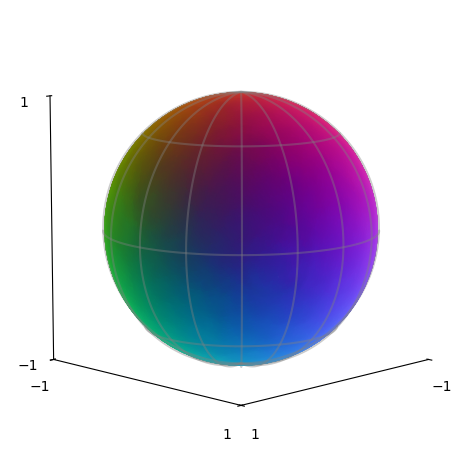

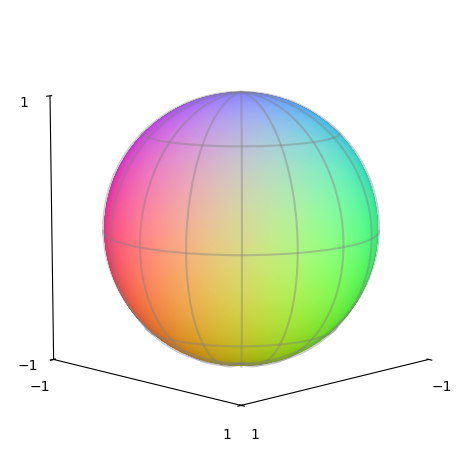

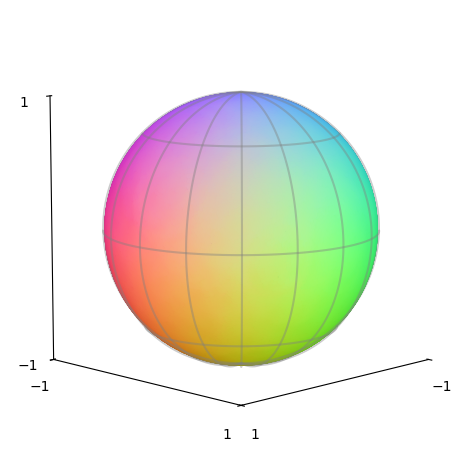

In [ ]:
perform_experiment(6, 'mlp', 1000)

# 6 Dimensions Linear Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.477495193481445 Pos Loss: -3.1373965740203857 Neg Loss: 11.614891052246094 Samples processed: 1 linear disentanglement: 0.6681011319160461 permutation disentanglement: 0.5655136858870308 angle_preservation_error: 0.4127904772758484


Loss: 8.477316856384277 Pos Loss: -3.128894805908203 Neg Loss: 11.606212615966797 Samples processed: 21 linear disentanglement: 0.6712318062782288 permutation disentanglement: 0.5686611837345515 angle_preservation_error: 0.410331666469574
Loss: 8.475977897644043 Pos Loss: -3.1235904693603516 Neg Loss: 11.599567413330078 Samples processed: 41 linear disentanglement: 0.6629336476325989 permutation disentanglement: 0.5786844490217091 angle_preservation_error: 0.4091927707195282
Loss: 8.457228660583496 Pos Loss: -3.129044532775879 Neg Loss: 11.586272239685059 Samples processed: 61 linear disentanglement: 0.6550477147102356 permutation disentanglement: 0.5690141596358288 angle_preservation_error: 0.40588271617889404
Loss: 8.453171730041504 Pos Loss: -3.1284968852996826 Neg Loss: 11.58166790008545 Samples processed: 81 linear disentanglement: 0.6629827618598938 permutation disentanglement: 0.5783006286467208 angle_preservation_error: 0.40466704964637756
Loss: 8.458341598510742 Pos Loss: -3.1

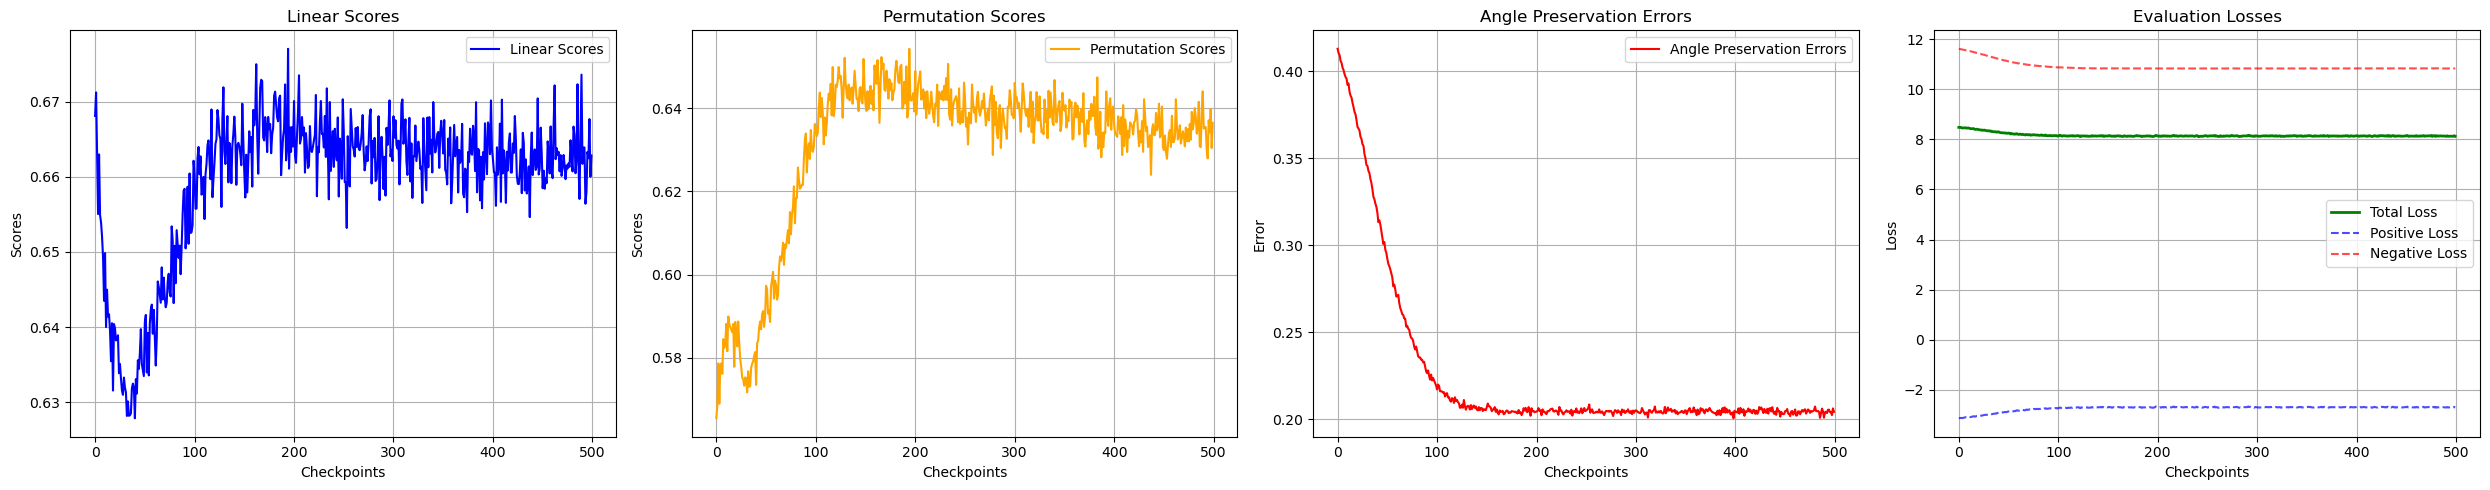

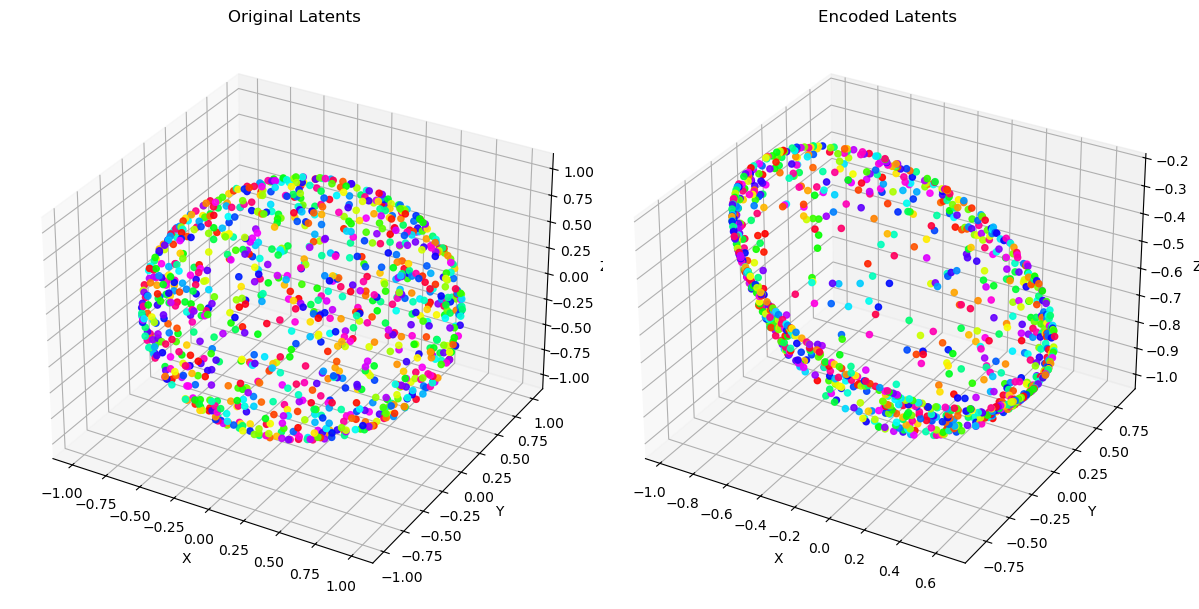

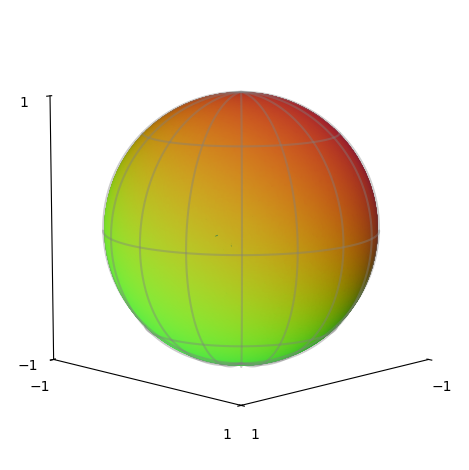

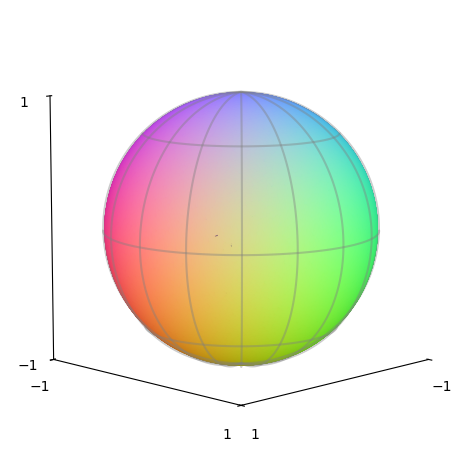

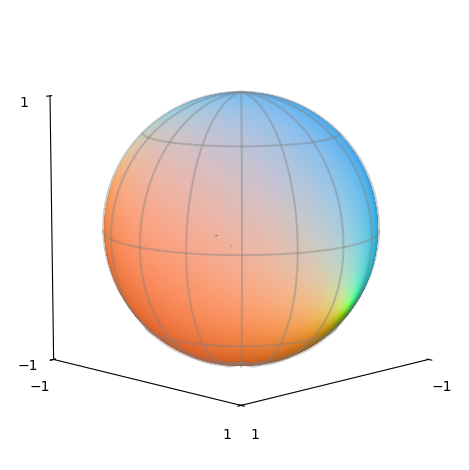

In [ ]:
# 6 Dimensions

perform_experiment(6, 'linear', 10000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.125765800476074 Pos Loss: -1.077485203742981 Neg Loss: 10.203250885009766 Samples processed: 1 linear disentanglement: 0.27632901072502136 permutation disentanglement: 0.373021227244017 angle_preservation_error: 0.273125559091568
Loss: 7.846159934997559 Pos Loss: -2.3162174224853516 Neg Loss: 10.16237735748291 Samples processed: 21 linear disentanglement: 0.9892699122428894 permutation disentanglement: 0.7881051881894156 angle_preservation_error: 0.0345861054956913
Loss: 7.8346147537231445 Pos Loss: -2.3248088359832764 Neg Loss: 10.159423828125 Samples processed: 41 linear disentanglement: 0.996401309967041 permutation disentanglement: 0.800208978173757 angle_preservation_error: 0.019776638597249985
Loss: 7.808010101318359 Pos Loss: -2.350813388824463 Neg Loss: 10.15882396697998 Samples processed: 61 linear disentanglement: 0.9978442788124084 permutation disentanglement: 0.7985787216615042 angle_preservation_error: 0.0153

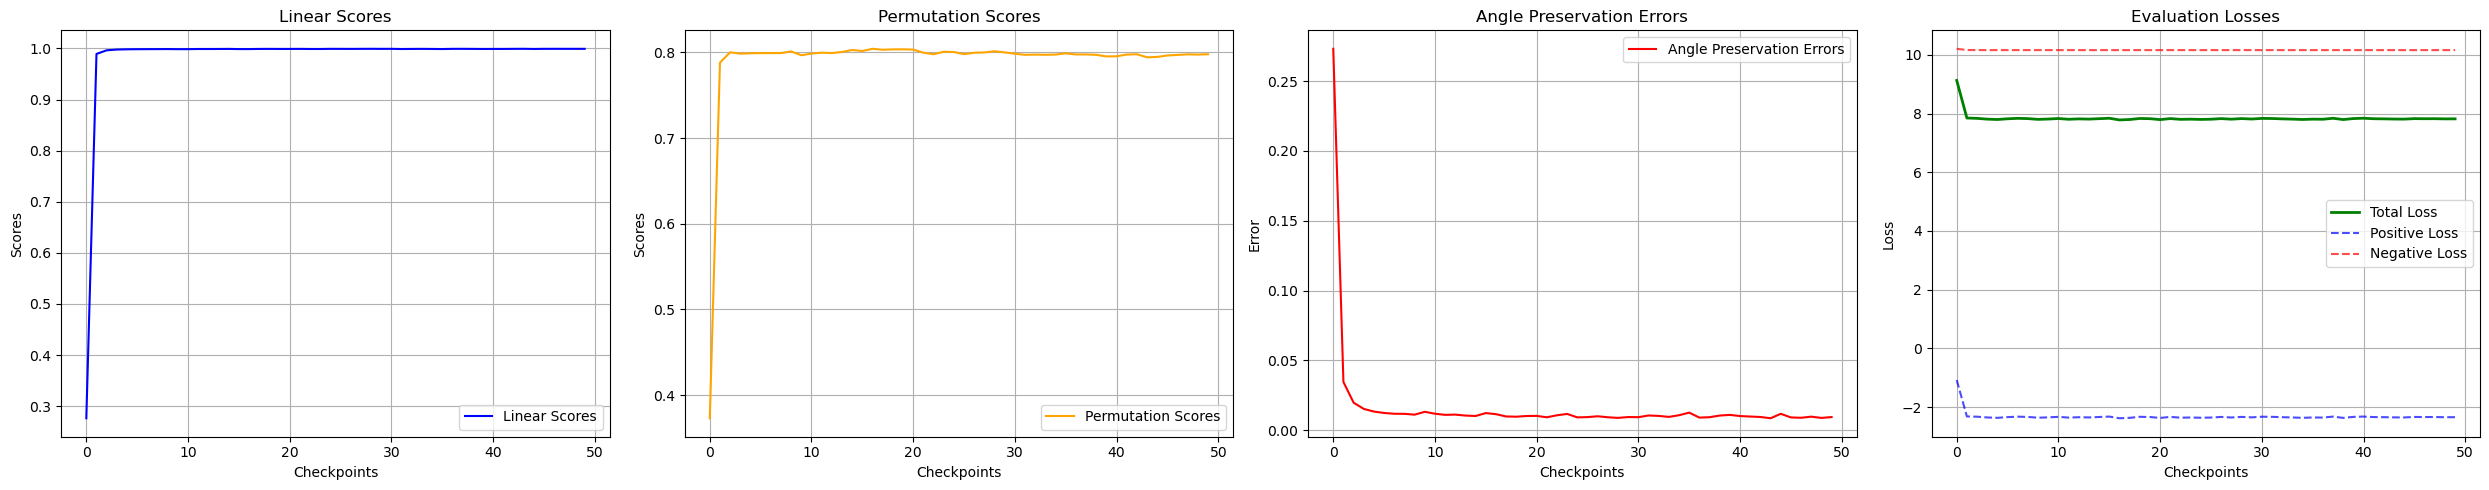

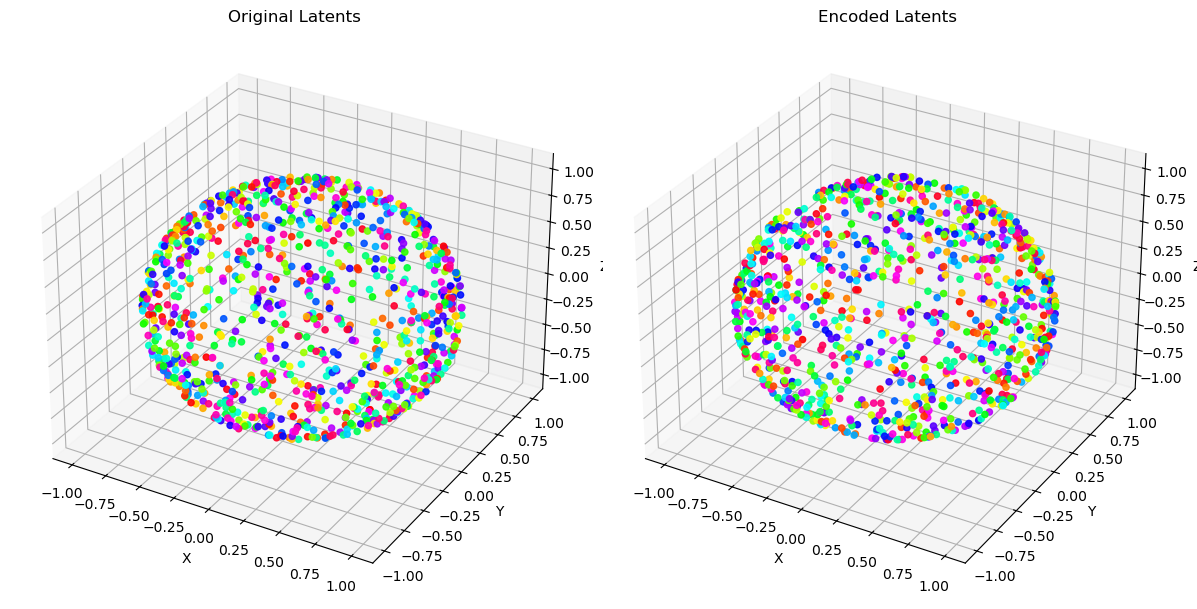

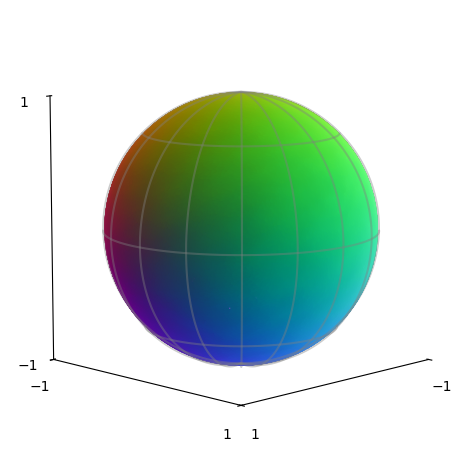

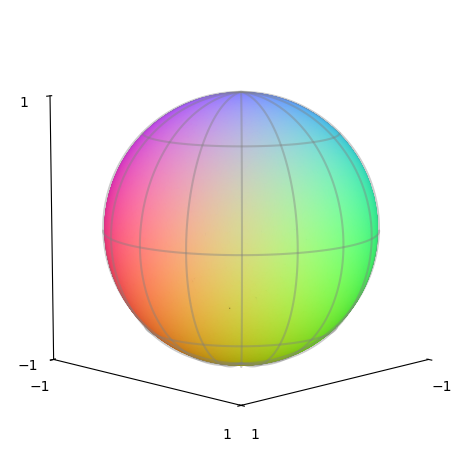

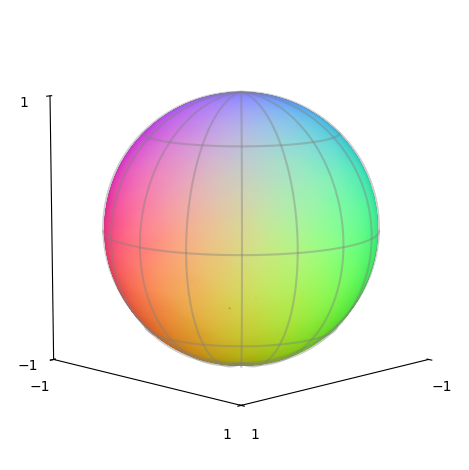

In [ ]:
# 7 Dimensions

perform_experiment(7, 'mlp', 1000)

Linear control score: 1.0
Permutation control score: 0.9999999999999999
Loss: 8.471296310424805 Pos Loss: -2.3082432746887207 Neg Loss: 10.779539108276367 Samples processed: 1 linear disentanglement: 0.7057695388793945 permutation disentanglement: 0.6646824546729752 angle_preservation_error: 0.23680943250656128
Loss: 8.464933395385742 Pos Loss: -2.3080201148986816 Neg Loss: 10.772953033447266 Samples processed: 21 linear disentanglement: 0.7037877440452576 permutation disentanglement: 0.6651449172041716 angle_preservation_error: 0.23510588705539703
Loss: 8.443160057067871 Pos Loss: -2.30820369720459 Neg Loss: 10.751363754272461 Samples processed: 41 linear disentanglement: 0.7101699709892273 permutation disentanglement: 0.6690413991023191 angle_preservation_error: 0.23489472270011902
Loss: 8.416126251220703 Pos Loss: -2.3364484310150146 Neg Loss: 10.75257396697998 Samples processed: 61 linear disentanglement: 0.7233783602714539 permutation disentanglement: 0.6722207787492275 angle_pres

Loss: 8.41295051574707 Pos Loss: -2.3244714736938477 Neg Loss: 10.737421989440918 Samples processed: 141 linear disentanglement: 0.7623813152313232 permutation disentanglement: 0.6811429208340312 angle_preservation_error: 0.2283174991607666
Loss: 8.386251449584961 Pos Loss: -2.3394391536712646 Neg Loss: 10.725690841674805 Samples processed: 161 linear disentanglement: 0.7659105658531189 permutation disentanglement: 0.680037491715804 angle_preservation_error: 0.22490066289901733
Loss: 8.365167617797852 Pos Loss: -2.348271608352661 Neg Loss: 10.713438034057617 Samples processed: 181 linear disentanglement: 0.775787889957428 permutation disentanglement: 0.6877838074644326 angle_preservation_error: 0.22628521919250488
Loss: 8.370375633239746 Pos Loss: -2.3387951850891113 Neg Loss: 10.709171295166016 Samples processed: 201 linear disentanglement: 0.7854741215705872 permutation disentanglement: 0.6929500339642635 angle_preservation_error: 0.2228725701570511
Loss: 8.37374496459961 Pos Loss: -

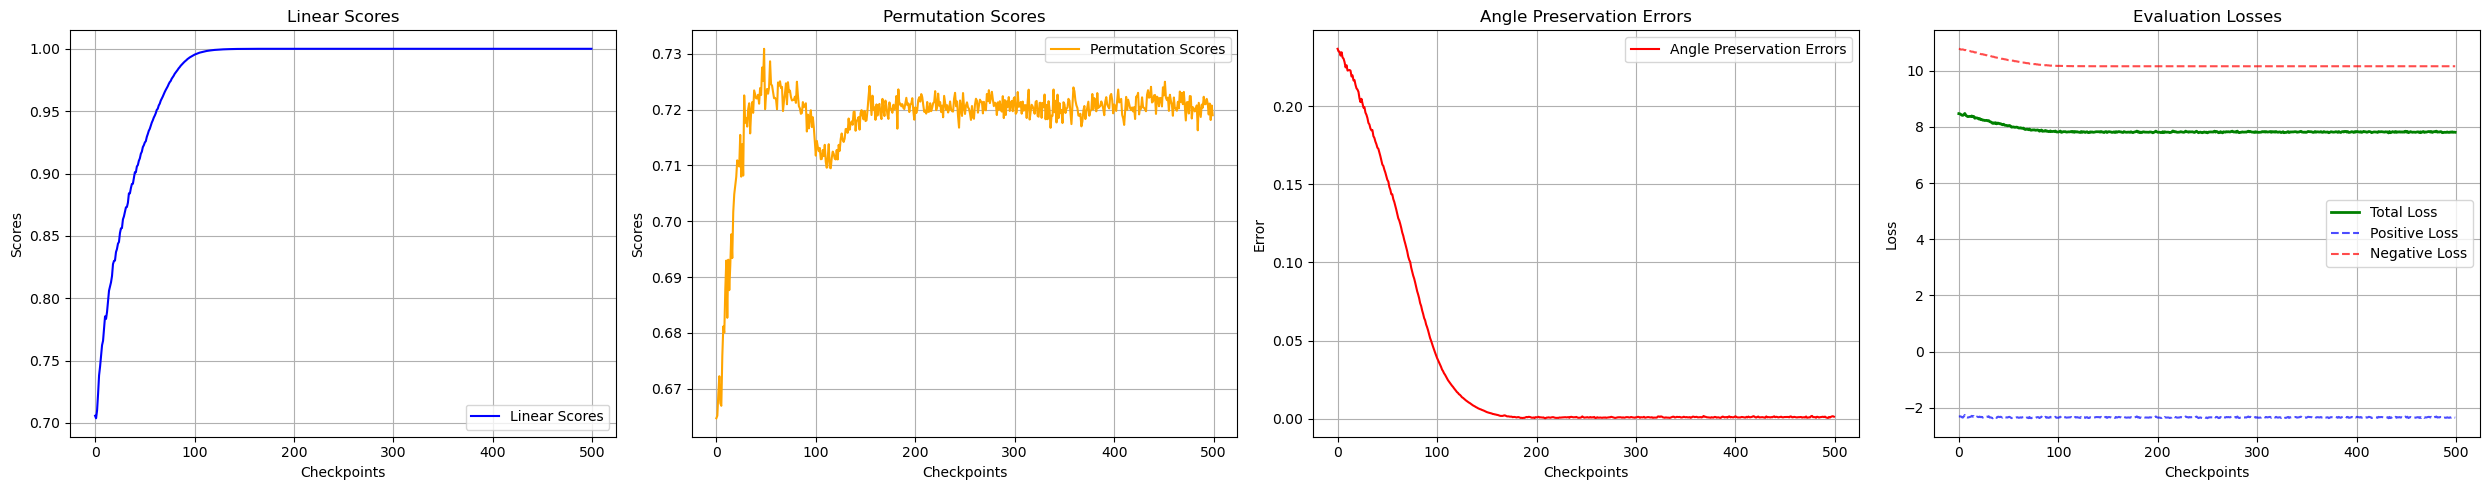

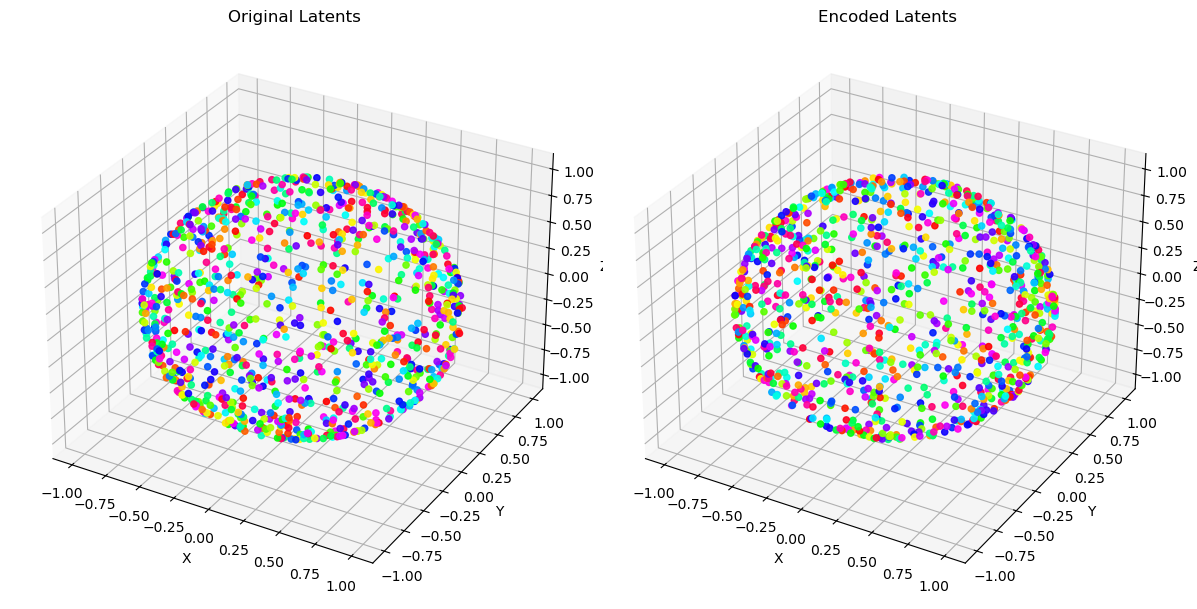

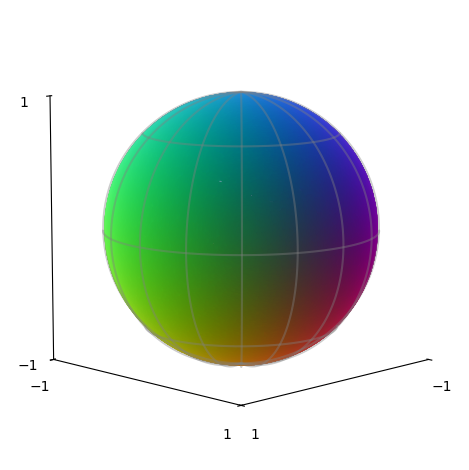

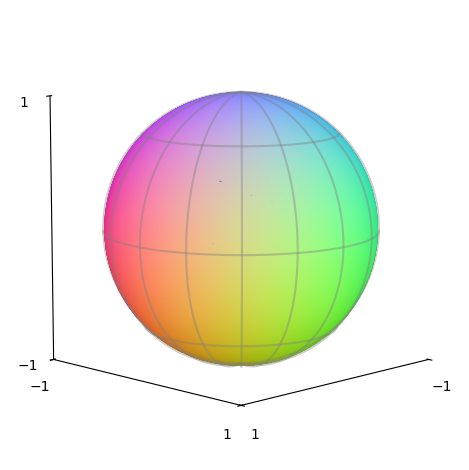

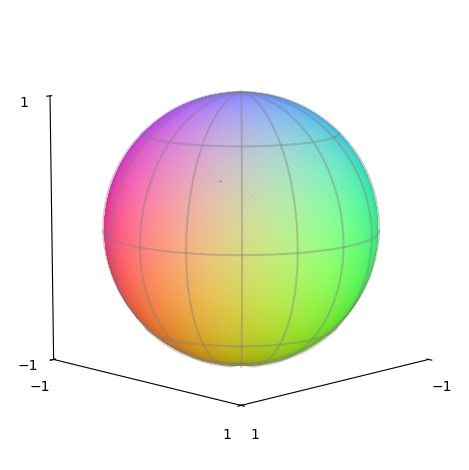

In [ ]:
perform_experiment(7, 'linear', 10000)